In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Housing.csv')
df.head
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [16]:

df['mainroad'] = df['mainroad'].replace({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].replace({'yes': 1, 'no': 0})
df['basement'] = df['basement'].replace({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].replace({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].replace({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].replace({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].replace({'unfurnished': 1, 'furnished': 0, 'semi-furnished':2})

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]], df.price,test_size=0.2)

In [18]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,16200,5,3,2,1,0,0,0,0,0,0,1
520,7700,2,1,1,1,0,0,0,0,0,0,1
101,5500,3,1,3,1,0,0,0,0,1,1,1
205,6300,3,1,1,1,0,0,0,1,2,0,2
470,5076,3,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99,6000,4,1,3,1,1,1,0,0,0,1,1
276,4400,2,1,1,1,0,0,0,0,1,0,2
156,6900,3,1,1,1,1,1,0,0,0,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,0


In [19]:
y_train

7      10150000
520     2450000
101     6230000
205     4900000
470     3010000
         ...   
99      6265000
276     4305000
156     5523000
1      12250000
407     3465000
Name: price, Length: 436, dtype: int64

In [20]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
model = linear_model.LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
Y_pred = model.predict(X_test)

In [25]:
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean Squared Error: ", mean_squared_error(y_test,Y_pred))
print("Coefficient of determination: ", r2_score(y_test, Y_pred))

Coefficients:  [2.54719037e+02 1.16564659e+05 1.08477639e+06 4.73176507e+05
 3.12938217e+05 3.15785963e+05 3.30891472e+05 8.26280259e+05
 9.12883646e+05 3.20083465e+05 7.23037412e+05 1.15605216e+04]
Intercept:  -312865.29441743065
Mean Squared Error:  1296955672847.3936
Coefficient of determination:  0.5036588958107655


In [26]:
import seaborn as sns

In [27]:
y_test

452    3150000
176    5250000
41     7840000
300    4200000
202    4900000
        ...   
250    4515000
454    3143000
401    3500000
434    3290000
272    4340000
Name: price, Length: 109, dtype: int64

<AxesSubplot: xlabel='price'>

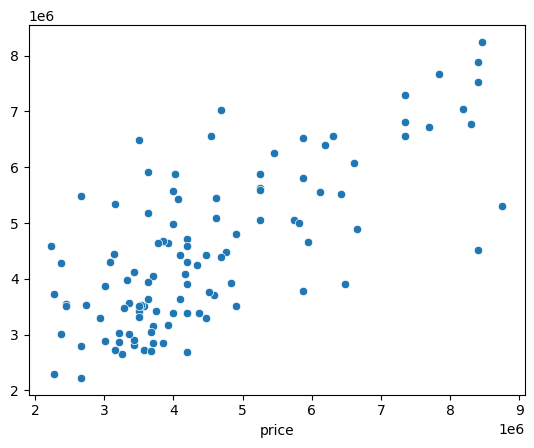

In [42]:
sns.scatterplot(x = y_test, y = Y_pred, alpha=1)

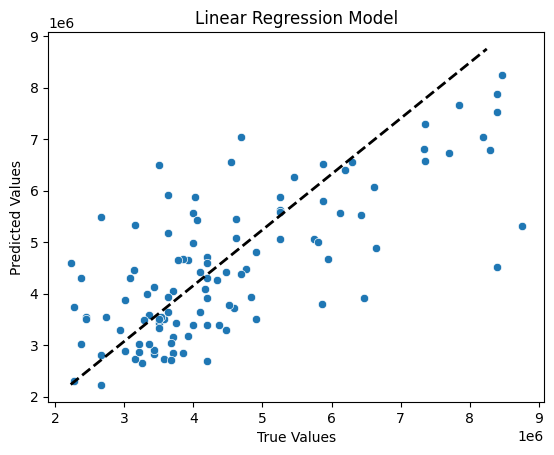

In [43]:
import matplotlib.pyplot as plt


sns.scatterplot(x=y_test, y=Y_pred, alpha=1)

plt.plot([Y_pred.min(), Y_pred.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 


plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')

plt.show()
